In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, kstest
from sklearn.datasets import load_iris

In [ ]:
# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
def perform_hypothesis_test(stat, p_value, alpha=0.05, null_hypothesis="", alternative_hypothesis=""):
    """
    Perform hypothesis testing using a common decision rule for the p-value.

    Parameters:
    - stat : The test statistic.
    - p_value : The p-value obtained from the test.
    - alpha : The significance level (default: 0.05).
    - null_hypothesis : Description of the null hypothesis.
    - alternative_hypothesis : Description of the alternative hypothesis.

    Returns:
    - Dictionary containing results and decision.
    """
    # Decision Rule: Common for all tests
    decision = (
        f"Reject the null hypothesis: {alternative_hypothesis}"
        if p_value < alpha
        else f"Fail to reject the null hypothesis: {null_hypothesis}"
    )

    return {
        "statistic": stat,
        "p_value": p_value,
        "alpha": alpha,
        "null_hypothesis": null_hypothesis,
        "alternative_hypothesis": alternative_hypothesis,
        "decision": decision,
    }


# **Z-Test (One-Sample)**
> Compare mean of a sample to a known population mean

Test if the mean sepal length of Versicolor is significantly different from the population mean of 6.0 (hypothetical population mean).

- **Null Hypothesis** (𝐻0): *The mean sepal length of Versicolor is equal to 6.0.*
- **Alternative Hypothesis** (𝐻1): *The mean sepal length of Versicolor is not equal to 6.0.*

In [ ]:
from statsmodels.stats.weightstats import ztest

# Data preparation
versicolor_sepal_length = df[df['species'] == 'versicolor']['sepal length (cm)']

# Perform One-Sample Z-Test
# Population mean = 6.0
stat, p_value = ztest(versicolor_sepal_length, value=6.0)

# Use the generalized decision function
result_z_test_one_sample = perform_hypothesis_test(
    stat=stat,
    p_value=p_value,
    alpha=0.05,
    null_hypothesis="The mean sepal length of Versicolor is equal to 6.0.",
    alternative_hypothesis="The mean sepal length of Versicolor is not equal to 6.0.",
)
print("One-Sample Z-Test Results:")
result_z_test_one_sample


One-Sample Z-Test Results:


{'statistic': -0.8767408688641777,
 'p_value': 0.3806274030991602,
 'alpha': 0.05,
 'null_hypothesis': 'The mean sepal length of Versicolor is equal to 6.0.',
 'alternative_hypothesis': 'The mean sepal length of Versicolor is not equal to 6.0.',
 'decision': 'Fail to reject the null hypothesis: The mean sepal length of Versicolor is equal to 6.0.'}

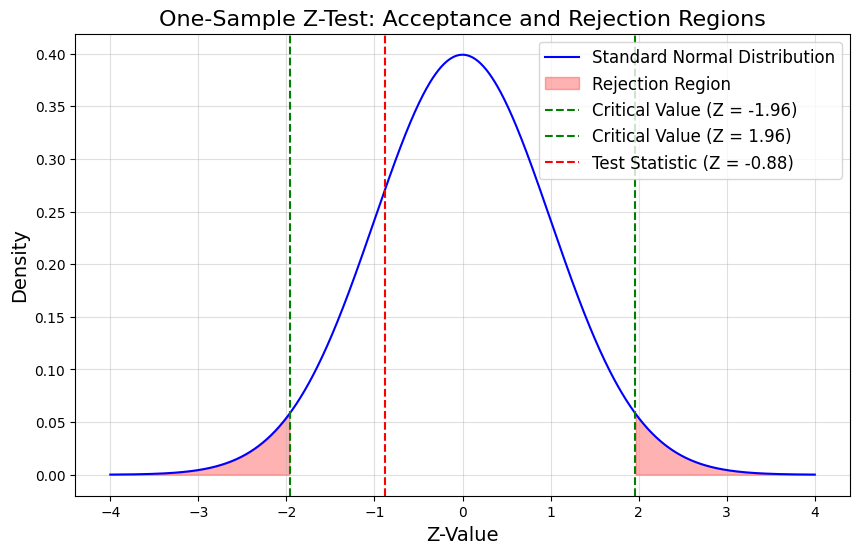

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Z-Test results
stat = result_z_test_one_sample['statistic']  # Test statistic from the Z-test
alpha = result_z_test_one_sample['alpha']    # Significance level
p_value = result_z_test_one_sample['p_value']  # P-value

# Critical values for a two-tailed test
critical_value = norm.ppf(1 - alpha / 2)  # Right-tailed critical value
negative_critical_value = -critical_value  # Left-tailed critical value

# Z-values and the normal curve
x = np.linspace(-4, 4, 1000)  # Z-values for plotting
y = norm.pdf(x)  # Probability density function of the normal distribution

# Plotting the standard normal curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label="Standard Normal Distribution")

# Shading the rejection regions
plt.fill_between(x, y, 0, where=(x <= negative_critical_value), color='red', alpha=0.3, label="Rejection Region")
plt.fill_between(x, y, 0, where=(x >= critical_value), color='red', alpha=0.3)

# Adding critical values
plt.axvline(negative_critical_value, color='green', linestyle='--', label=f"Critical Value (Z = {negative_critical_value:.2f})")
plt.axvline(critical_value, color='green', linestyle='--', label=f"Critical Value (Z = {critical_value:.2f})")

# Adding the test statistic
plt.axvline(stat, color='red', linestyle='--', linewidth=1.5, label=f"Test Statistic (Z = {stat:.2f})")

# Labels, legend, and title
plt.title("One-Sample Z-Test: Acceptance and Rejection Regions", fontsize=16)
plt.xlabel("Z-Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()


# **Z-Test (Two-Sample)**
# Compare means of two independent groups

Scenario:
Test if the mean petal width of Setosa is significantly different from Virginica.

- **Null Hypothesis** (𝐻0): *The mean petal width of Setosa is equal to the mean petal width of Virginica.*
- **Alternative Hypothesis** (𝐻1): The mean petal width of Setosa is not equal to the mean petal width of Virginica.

In [ ]:
# Data preparation
setosa_petal_width = df[df['species'] == 'setosa']['petal width (cm)']
virginica_petal_width = df[df['species'] == 'virginica']['petal width (cm)']

# Perform Two-Sample Z-Test
stat, p_value = ztest(setosa_petal_width, virginica_petal_width)

# Use the generalized decision function
result_z_test_two_sample = perform_hypothesis_test(
    stat=stat,
    p_value=p_value,
    alpha=0.05,
    null_hypothesis="The mean petal width of Setosa is equal to the mean petal width of Virginica.",
    alternative_hypothesis="The mean petal width of Setosa is not equal to the mean petal width of Virginica.",
)
print("Two-Sample Z-Test Results:")
result_z_test_two_sample


Two-Sample Z-Test Results:


{'statistic': -42.7857975196172,
 'p_value': 0.0,
 'alpha': 0.05,
 'null_hypothesis': 'The mean petal width of Setosa is equal to the mean petal width of Virginica.',
 'alternative_hypothesis': 'The mean petal width of Setosa is not equal to the mean petal width of Virginica.',
 'decision': 'Reject the null hypothesis: The mean petal width of Setosa is not equal to the mean petal width of Virginica.'}

# **ANOVA**:
# Compare means of multiple groups

Scenario:
Compare the sepal widths of all three species (Setosa, Versicolor, and Virginica).

- **Null Hypothesis** (𝐻0): *The mean sepal widths of all three species are equal*.
- **Alternative Hypothesis** (𝐻1​): *At least one species has a different mean sepal width*.

In [ ]:
from scipy.stats import f_oneway

# Data preparation
setosa_sepal_width = df[df['species'] == 'setosa']['sepal width (cm)']
versicolor_sepal_width = df[df['species'] == 'versicolor']['sepal width (cm)']
virginica_sepal_width = df[df['species'] == 'virginica']['sepal width (cm)']

# Perform ANOVA
stat, p_value = f_oneway(setosa_sepal_width, versicolor_sepal_width, virginica_sepal_width)

# Use the generalized decision function
result_anova = perform_hypothesis_test(
    stat=stat,
    p_value=p_value,
    alpha=0.05,
    null_hypothesis="The mean sepal widths of all three species are equal.",
    alternative_hypothesis="At least one species has a different mean sepal width.",
)
print("ANOVA Results:")
result_anova



ANOVA Results:


{'statistic': 49.160040089612075,
 'p_value': 4.492017133309115e-17,
 'alpha': 0.05,
 'null_hypothesis': 'The mean sepal widths of all three species are equal.',
 'alternative_hypothesis': 'At least one species has a different mean sepal width.',
 'decision': 'Reject the null hypothesis: At least one species has a different mean sepal width.'}

#  **T-Test**
# Comparing Two Models

Problem:
We compare Accuracies of two classification models (e.g., Logistic Regression and Decision Tree) on the Iris dataset.


- **Null Hypothesis** (𝐻0): *The mean performance of the two models is equal.*
- **Alternative Hypothesis** (𝐻1): *The mean performance of the two models is not equal.*

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_rel

# Load the Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']  # Target: species

# Number of iterations for repeated evaluation
n_iterations = 30
accuracy_logistic = []
accuracy_tree = []

# Repeat model training and evaluation
for i in range(n_iterations):
    # Split the data randomly
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Logistic Regression
    log_model = LogisticRegression(max_iter=200, random_state=i)
    log_model.fit(X_train, y_train)
    y_pred_log = log_model.predict(X_test)
    accuracy_logistic.append(accuracy_score(y_test, y_pred_log))

    # Decision Tree Classifier
    tree_model = DecisionTreeClassifier(random_state=i)
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    accuracy_tree.append(accuracy_score(y_test, y_pred_tree))

# Perform Paired T-Test
t_stat, p_value = ttest_rel(accuracy_logistic, accuracy_tree)

# Decision Rule
alpha = 0.05
if p_value < alpha:
    decision = "Reject the null hypothesis: The two models have significantly different performances."
else:
    decision = "Fail to reject the null hypothesis: No significant difference in the models' performances."

# Print results
print("Paired T-Test Results:")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Decision: {decision}")

# Optional: Print Mean Accuracies
print(f"\nMean Accuracy of Logistic Regression: {np.mean(accuracy_logistic):.4f}")
print(f"Mean Accuracy of Decision Tree: {np.mean(accuracy_tree):.4f}")


Paired T-Test Results:
T-Statistic: 6.13
P-Value: 0.0000
Decision: Reject the null hypothesis: The two models have significantly different performances.

Mean Accuracy of Logistic Regression: 0.9659
Mean Accuracy of Decision Tree: 0.9481
